In [1]:
import numpy as np
import newbridge as nb
import parameters as prm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# load data
import pickle
with open('nem_4D.pkl','rb') as f:
    xout, tout, x_without_noise, euler_param, sim_param = pickle.load(f)

In [3]:
print(xout.shape)
print(tout.shape)

(6, 101, 4)
(6, 101)


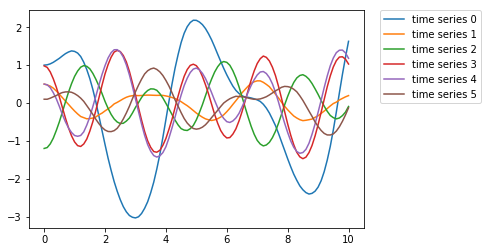

In [4]:
p0, = plt.plot(tout[0, :], xout[0, :, 0], label='time series 0')
p1, = plt.plot(tout[0, :], xout[1, :, 0], label='time series 1')
p2, = plt.plot(tout[0, :], xout[2, :, 0], label='time series 2')
p3, = plt.plot(tout[0, :], xout[3, :, 0], label='time series 3')
p4, = plt.plot(tout[0, :], xout[4, :, 0], label='time series 4')
p5, = plt.plot(tout[0, :], xout[5, :, 0], label='time series 5')

plt.legend(handles = [p0, p1, p2, p3, p4, p5], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

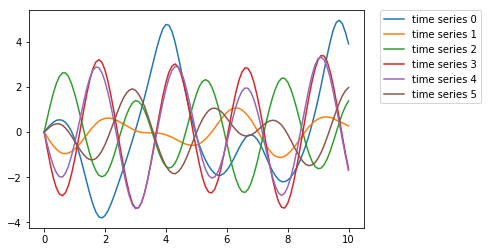

In [5]:
p0, = plt.plot(tout[0, :], xout[0, :, 1], label='time series 0')
p1, = plt.plot(tout[0, :], xout[1, :, 1], label='time series 1')
p2, = plt.plot(tout[0, :], xout[2, :, 1], label='time series 2')
p3, = plt.plot(tout[0, :], xout[3, :, 1], label='time series 3')
p4, = plt.plot(tout[0, :], xout[4, :, 1], label='time series 4')
p5, = plt.plot(tout[0, :], xout[5, :, 1], label='time series 5')

plt.legend(handles = [p0, p1, p2, p3, p4, p5], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

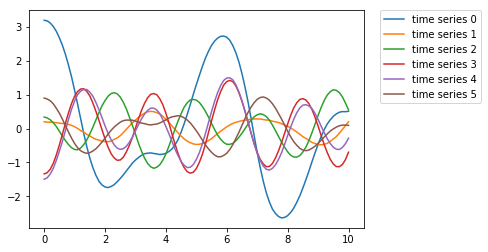

In [6]:
p0, = plt.plot(tout[0, :], xout[0, :, 2], label='time series 0')
p1, = plt.plot(tout[0, :], xout[1, :, 2], label='time series 1')
p2, = plt.plot(tout[0, :], xout[2, :, 2], label='time series 2')
p3, = plt.plot(tout[0, :], xout[3, :, 2], label='time series 3')
p4, = plt.plot(tout[0, :], xout[4, :, 2], label='time series 4')
p5, = plt.plot(tout[0, :], xout[5, :, 2], label='time series 5')

plt.legend(handles = [p0, p1, p2, p3, p4, p5], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

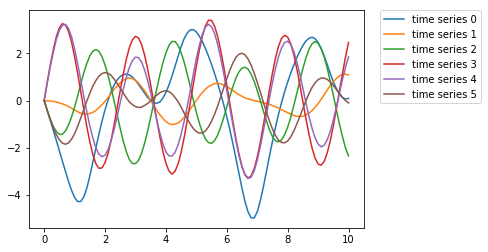

In [7]:
p0, = plt.plot(tout[0, :], xout[0, :, 3], label='time series 0')
p1, = plt.plot(tout[0, :], xout[1, :, 3], label='time series 1')
p2, = plt.plot(tout[0, :], xout[2, :, 3], label='time series 2')
p3, = plt.plot(tout[0, :], xout[3, :, 3], label='time series 3')
p4, = plt.plot(tout[0, :], xout[4, :, 3], label='time series 4')
p5, = plt.plot(tout[0, :], xout[5, :, 3], label='time series 5')

plt.legend(handles = [p0, p1, p2, p3, p4, p5], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

In [36]:
def H(degree, x):
    switcher = {
        0: 0.63161877774606470129,
        1: 0.63161877774606470129 * x,
        2: 0.44662192086900116570 * (np.power(x, 2) - 1),
        3: 0.25785728623970555997 * (np.power(x, 3) - 3 * x),
        4: 0.12892864311985277998 * (np.power(x, 4) - 6 * np.power(x, 2) + 3),
    }
    return switcher.get(degree, "Polynomial degree exceeded")

def hermite_basis(x):
    y = np.zeros((x.shape[0], prm.dof))
    index = 0

    for d in range(0, prm.polynomial_degree):
        for i in range(0, d + 1):
            for j in range(0, d + 1):
                for k in range(0, d + 1):
                    for l in range(0, d + 1):
                        if (i + j + k + l == d):
                            print()
                            print("d", d, "i", i, "j", j, "k", k, "l", l, "index", index)
                            y[:, index] = H(i, x[:, 0]) * H(j, x[:, 0]) * H(k, x[:, 0]) * H(l, x[:, 0])
                            index += 1

    return y

In [37]:
x = np.array([[1., 2., 3., 4.], [2., 4., 6., 8.]])
y = hermite_basis(x)

d 0 i 0 j 0 k 0 l 0 index 0
d 1 i 0 j 0 k 0 l 1 index 1
d 1 i 0 j 0 k 1 l 0 index 2
d 1 i 0 j 1 k 0 l 0 index 3
d 1 i 1 j 0 k 0 l 0 index 4
d 2 i 0 j 0 k 0 l 2 index 5
d 2 i 0 j 0 k 1 l 1 index 6
d 2 i 0 j 0 k 2 l 0 index 7
d 2 i 0 j 1 k 0 l 1 index 8
d 2 i 0 j 1 k 1 l 0 index 9
d 2 i 0 j 2 k 0 l 0 index 10
d 2 i 1 j 0 k 0 l 1 index 11
d 2 i 1 j 0 k 1 l 0 index 12
d 2 i 1 j 1 k 0 l 0 index 13
d 2 i 2 j 0 k 0 l 0 index 14
d 3 i 0 j 0 k 0 l 3 index 15
d 3 i 0 j 0 k 1 l 2 index 16
d 3 i 0 j 0 k 2 l 1 index 17
d 3 i 0 j 0 k 3 l 0 index 18
d 3 i 0 j 1 k 0 l 2 index 19
d 3 i 0 j 1 k 1 l 1 index 20
d 3 i 0 j 1 k 2 l 0 index 21
d 3 i 0 j 2 k 0 l 1 index 22
d 3 i 0 j 2 k 1 l 0 index 23
d 3 i 0 j 3 k 0 l 0 index 24
d 3 i 1 j 0 k 0 l 2 index 25
d 3 i 1 j 0 k 1 l 1 index 26
d 3 i 1 j 0 k 2 l 0 index 27
d 3 i 1 j 1 k 0 l 1 index 28
d 3 i 1 j 1 k 1 l 0 index 29
d 3 i 1 j 2 k 0 l 0 index 30
d 3 i 2 j 0 k 0 l 1 index 31
d 3 i 2 j 0 k 1 l 0 index 32
d 3 i 2 j 1 k 0 l 0 index 33
d 3 i 3 j 0 k 0 l 0 inde

In [38]:
print(y)

[[ 0.15915494  0.15915494  0.15915494  0.15915494  0.15915494  0.
   0.15915494  0.          0.15915494  0.15915494  0.          0.15915494
   0.15915494  0.15915494  0.         -0.12994947  0.          0.
  -0.12994947  0.          0.15915494  0.          0.          0.
  -0.12994947  0.          0.15915494  0.          0.15915494  0.15915494
   0.          0.          0.          0.         -0.12994947]
 [ 0.15915494  0.31830989  0.31830989  0.31830989  0.31830989  0.33761862
   0.63661977  0.33761862  0.63661977  0.63661977  0.33761862  0.63661977
   0.63661977  0.63661977  0.33761862  0.12994947  0.67523724  0.67523724
   0.12994947  0.67523724  1.27323954  0.67523724  0.67523724  0.67523724
   0.12994947  0.67523724  1.27323954  0.67523724  1.27323954  1.27323954
   0.67523724  0.67523724  0.67523724  0.67523724  0.12994947]]


In [35]:
y.shape

(2, 35)